In [1]:
!pip install autogluon 

In [2]:
pip install "autogluon.timeseries[full]

Note: you may need to restart the kernel to use updated packages.


In [3]:
from autogluon.timeseries import TimeSeriesDataFrame

# Load the data
data_url = "https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_tiny/train.csv"
data = TimeSeriesDataFrame(data_url)

# Display the first few rows of the dataset
print(data.head())


                             target
item_id timestamp                  
H1      1750-01-01 00:00:00   605.0
        1750-01-01 01:00:00   586.0
        1750-01-01 02:00:00   586.0
        1750-01-01 03:00:00   559.0
        1750-01-01 04:00:00   511.0


In [4]:
prediction_length = 24  # Specify how many time steps you want to predict
train_data, test_data = data.train_test_split(prediction_length)


In [5]:
from autogluon.timeseries import TimeSeriesPredictor

# Initialize the predictor
predictor = TimeSeriesPredictor(prediction_length=prediction_length)

# Fit the model
predictor.fit(train_data, presets="chronos_tiny")


Beginning AutoGluon training...
AutoGluon will save models to 'AutogluonModels\ag-20240521_184849'
=================== System Info ===================
AutoGluon Version:  1.1.0
Python Version:     3.11.5
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
GPU Count:          0
Memory Avail:       0.69 GB / 7.65 GB (9.1%)
Disk Space Avail:   149.74 GB / 475.79 GB (31.5%)
Setting presets to: chronos_tiny

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': WQL,
 'hyperparameters': {'Chronos': {'model_path': 'tiny'}},
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'skip_model_selection': True,
 'target': 'target',
 'verbosity': 2}

Inferred time series frequency: 'H'
Provided train_data has 13520 rows, 20 time series. Median time series length is 676 

Model not specified in predict, will default to the model with the best validation score: Chronos[tiny]


config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/33.6M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

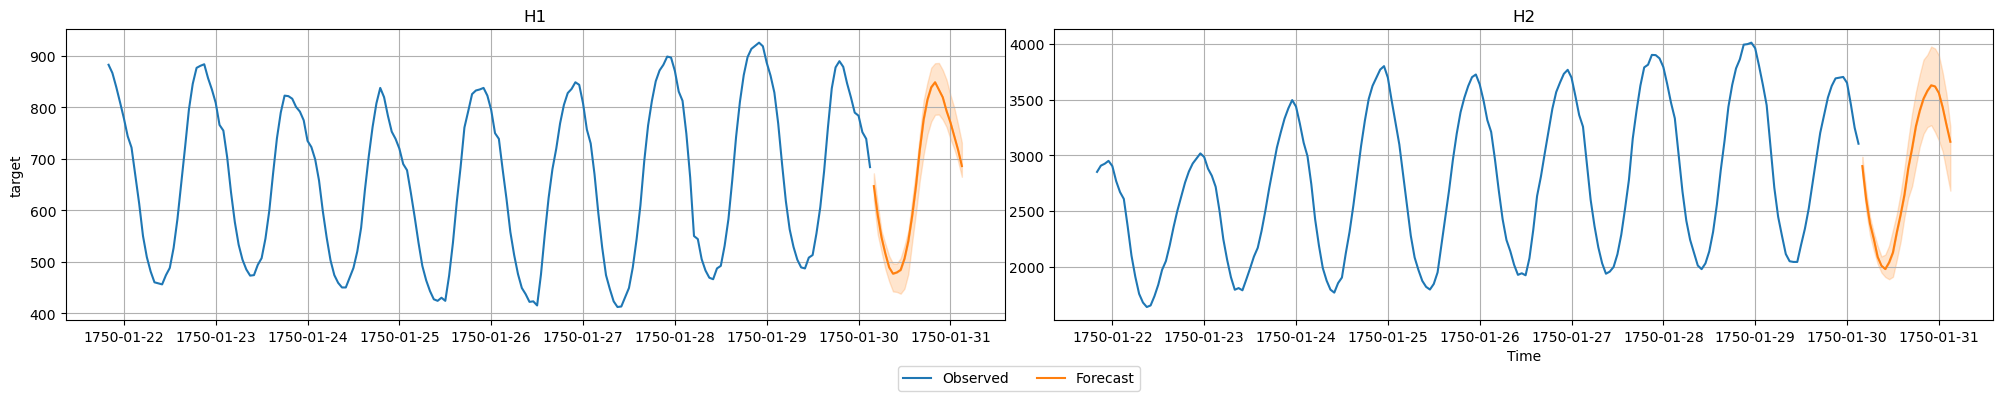

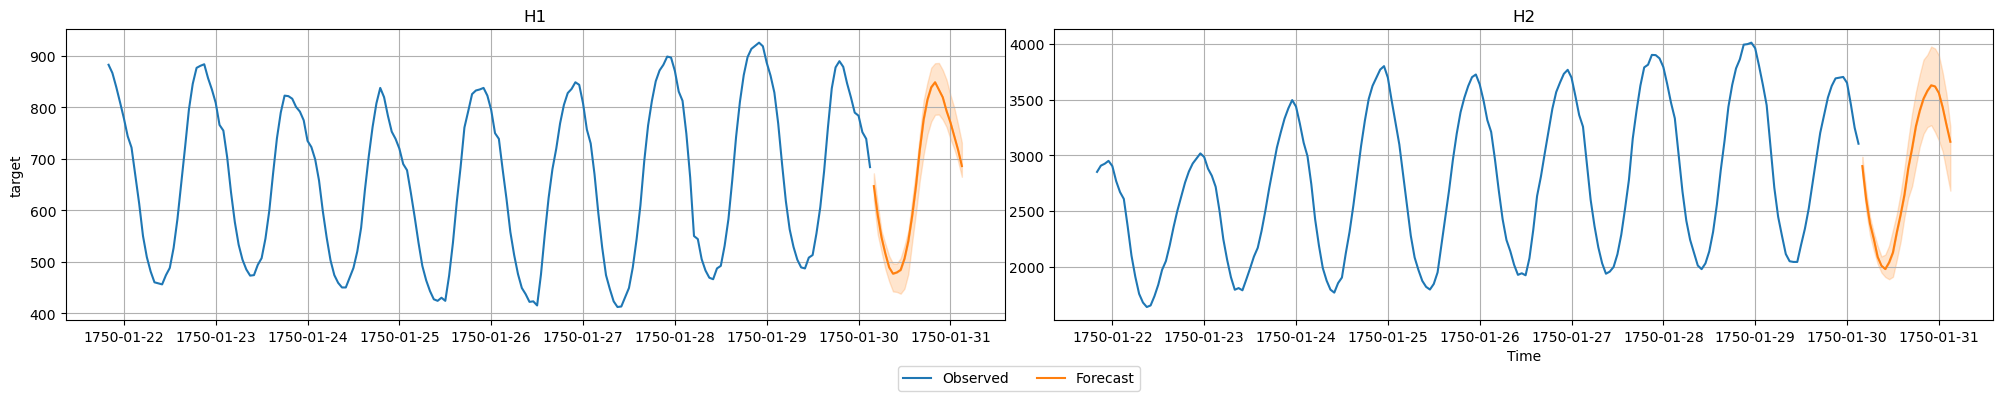

In [6]:
# Generate predictions
predictions = predictor.predict(test_data)

# Optionally, plot the predictions against the actual data
predictor.plot(
    data=test_data, 
    predictions=predictions, 
    item_ids=["H1", "H2"],  # Adjust based on your data
    max_history_length=200
)


In [7]:

predictor = TimeSeriesPredictor(prediction_length=prediction_length).fit(
    train_data,
    hyperparameters={
        "Chronos": {
            "model_path": "tiny",
            "batch_size": 64,
            "device": "cpu",
            "optimization_strategy": "openvino",  # Using OpenVINO for Intel CPUs
        }
    },
    skip_model_selection=True,
    verbosity=0,
)
